### Timeline of download and playback


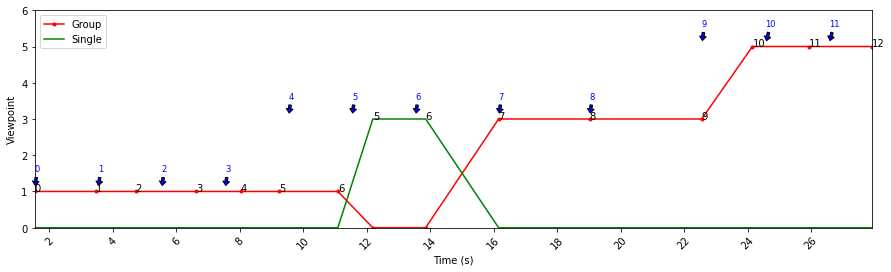

In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


# ==================================================
csv_path = '../ns-3-allinone/ns-3.35/contrib/etri_mvdash/'
simId = 0
clientId = 0

def read_playbacklog(csv_path, simId, clientId) :
    playfilename = csv_path + "playback_sim" + str(simId) +"_cl" + str(clientId) + ".csv"
    return pd.read_csv(playfilename, sep="\t")

def read_donwloadlog(csv_path, simId, clientId) :
    filename = csv_path + "downlog_sim" + str(simId) +"_cl" + str(clientId) + ".csv"
    return pd.read_csv(filename, sep="\t")




def show_multiview_play(df_play,df_download) :
    playView = df_play["vp"]+1
    playStart=df_play["Start"]*1/1000000
    playShape= df_play.shape[0]
    playSegment = df_play["Seg"]


    reqType = df_download["Group?"]
    mainView = df_download["mainView"] #download viewpoint priority
    segment = df_download["Segment"]
    downEnd = df_download["DownEnd"]
    downShape=df_download.shape[0]
    nSegments = len(set(segment))

    groupDown=[0]*downShape
    singleDown=[0]*downShape
    for i in range (0,downShape):
        if (reqType[i]==1):
            groupDown[i]=mainView[i]+1
        else:
            singleDown[i]=mainView[i]+1
    # groupDown=np.array(groupDown)

    x=downEnd[:downShape]*1/1000000
    fig,ax = plt.subplots(figsize=(15, 4))
    ax.plot(x, groupDown, 'r.-',label='Group')
    ax.plot(x, singleDown, 'g-',label='Single')
    # ax.plot(x, mainView+1, 'b.',label='Played segment')
    ax.legend(loc='upper left')

    ax.set_ylim([0, 6])
    ax.set_ylabel("Viewpoint")
    ax.set_xlabel("Time (s)")
    ax.autoscale_view()


    #Segment annotation
    for h in range(0,downShape):
        if(groupDown[h]!=0):
            ax.annotate(segment[h], xy =(x[h], groupDown[h]))
        elif(singleDown[h]!=0):
            ax.annotate(segment[h], xy =(x[h], singleDown[h]))

    #Play annotation
    for p in range(0,playShape):
        # if(p>1):
            # if (playView[p]!=playView[p-1]):
        ax.annotate(playSegment[p], xy =(playStart[p], playView[p]),xytext=(0, 20),
        textcoords='offset points',
        color='b', size='small',
        arrowprops=dict(
            arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.5',
            facecolor='b', shrinkB=5 * 1.2))

    plt.xticks(np.arange(min(np.around(x)), max(np.around(x))+1, 2.0),rotation=45)
    # plt.xticks(np.arange(min(x), max(x)+1, 2.0))
    # plt.xticks(x,rotation=45)
    plt.margins(0, tight=True)
    plt.show()
    return

df_play = read_playbacklog(csv_path, simId, clientId)
df_download = read_donwloadlog(csv_path, simId, clientId)
show_multiview_play(df_play,df_download)